In [51]:
from __future__ import division
from __future__ import print_function

import os
import sys
from time import time

# temporary solution for relative imports in case pyod is not installed
# if pyod is installed, no need to use the following line
sys.path.append(
    os.path.abspath(os.path.join(os.path.dirname("__file__"), '..')))

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.font_manager
import pandas as pd

# Import all models
from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.mcd import MCD
from pyod.models.ocsvm import OCSVM
from pyod.models.pca import PCA

In [52]:
df = pd.read_csv('input_150513.csv')
data = df.as_matrix()
Y = data[:,1:4]

In [53]:
min1 = min(Y[:,0])
max1 = max(Y[:,0])
min2 = min(Y[:,1])
max2 = max(Y[:,1])
min3 = min(Y[:,2])
max3 = max(Y[:,2])
min1, max1, min2, max2, min3, max3

(0.17929999999999999,
 30.2028,
 0.0001,
 0.99970000000000003,
 0.00020000000000000001,
 0.99809999999999999)

In [54]:
outliers_fraction = 0.05
clusters_separation = [0]

In [55]:
random_state = np.random.RandomState(42)
# Define nine outlier detection tools to be compared
classifiers = {'Angle-based Outlier Detector (ABOD)':
                   ABOD(n_neighbors=10,
                        contamination=outliers_fraction),
               'Histogram-base Outlier Detection (HBOS)': HBOS(
                   contamination=outliers_fraction),
               'K Nearest Neighbors (KNN)': KNN(
                   contamination=outliers_fraction),
               'Average KNN': KNN(method='mean',
                                  contamination=outliers_fraction),
               'Median KNN': KNN(method='median',
                                 contamination=outliers_fraction),
               'Local Outlier Factor (LOF)':
                   LOF(n_neighbors=35, contamination=outliers_fraction),
               'Minimum Covariance Determinant (MCD)': MCD(
                   contamination=outliers_fraction, random_state=random_state),
               'One-class SVM (OCSVM)': OCSVM(contamination=outliers_fraction,
                                              random_state=random_state),
               'Principal Component Analysis (PCA)': PCA(
                   contamination=outliers_fraction, random_state=random_state),
               }

In [56]:
def train(X, s1, e1, s2, e2):
    n_samples = len(X)
   

    # Compare given detectors under given settings
    # Initialize the data
    xx, yy = np.meshgrid(np.linspace(s1, e1, 100), np.linspace(s2, e2, 100))
    n_inliers = int((1. - outliers_fraction) * n_samples)
    n_outliers = int(outliers_fraction * n_samples)
    ground_truth = np.zeros(n_samples, dtype=int)
    ground_truth[-n_outliers:] = 1
    ans = np.zeros((len(X),1))
    for i, offset in enumerate(clusters_separation):
        
        np.random.seed(42)
        plt.figure(figsize=(15, 12))
        for i, (clf_name, clf) in enumerate(classifiers.items()):
            print(i + 1, 'fitting', clf_name)
            # fit the data and tag outliers
            clf.fit(X)
            scores_pred = clf.decision_function(X) * -1
            y_pred = clf.predict(X)
            ans += y_pred.reshape(len(X),1)
#             if(i==0):
#                 for l in range(len(y_pred)):
#                     if(y_pred[l]==1):
#                         O.append(l)

            threshold = stats.scoreatpercentile(scores_pred,
                                                100 * outliers_fraction)

            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
            Z = Z.reshape(xx.shape)
            subplot = plt.subplot(3, 4, i + 1)
            subplot.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),
                             cmap=plt.cm.Blues_r)
            a = subplot.contour(xx, yy, Z, levels=[threshold],
                                linewidths=2, colors='red')
            subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()],
                             colors='orange')
            b = subplot.scatter(X[:-n_outliers, 0], X[:-n_outliers, 1], c='white',
                                s=20, edgecolor='k')
    #         c = subplot.scatter(X[-n_outliers:, 0], X[-n_outliers:, 1], c='black',                            s=20, edgecolor='k')
            subplot.axis('tight')
            subplot.legend(
                [a.collections[0], b],
                ['learned decision function', 'true inliers'],
                prop=matplotlib.font_manager.FontProperties(size=10),
                loc='lower right')
    #         subplot.set_xlabel("%d. %s (errors: %d)" % (i + 1, clf_name, n_errors))
            subplot.set_xlim((s1, e1))
            subplot.set_ylim((s2, e2))
        plt.subplots_adjust(0.04, 0.1, 0.96, 0.94, 0.1, 0.26)
        plt.suptitle("Outlier detection")
    plt.show()
    return ans

In [57]:
ans = np.zeros((len(Y),1))

1 fitting Angle-based Outlier Detector (ABOD)
2 fitting Histogram-base Outlier Detection (HBOS)
3 fitting K Nearest Neighbors (KNN)
4 fitting Average KNN
5 fitting Median KNN
6 fitting Local Outlier Factor (LOF)
7 fitting Minimum Covariance Determinant (MCD)
8 fitting One-class SVM (OCSVM)
9 fitting Principal Component Analysis (PCA)


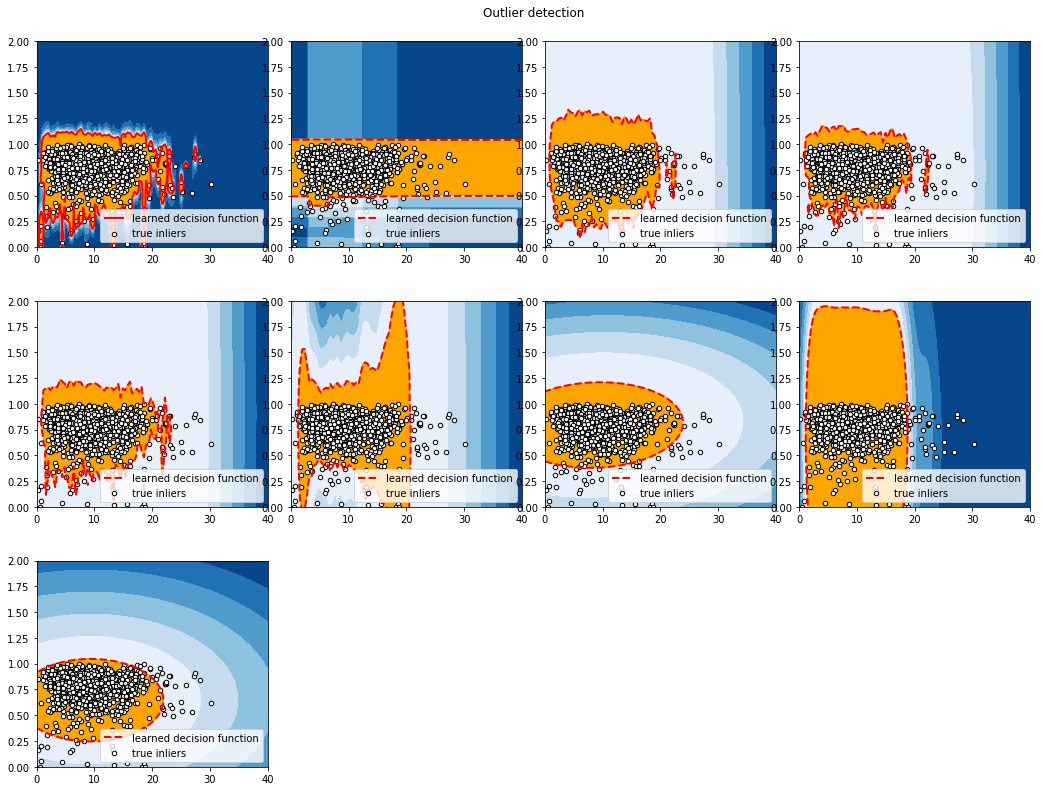

1 fitting Angle-based Outlier Detector (ABOD)
2 fitting Histogram-base Outlier Detection (HBOS)
3 fitting K Nearest Neighbors (KNN)
4 fitting Average KNN
5 fitting Median KNN
6 fitting Local Outlier Factor (LOF)
7 fitting Minimum Covariance Determinant (MCD)
8 fitting One-class SVM (OCSVM)
9 fitting Principal Component Analysis (PCA)


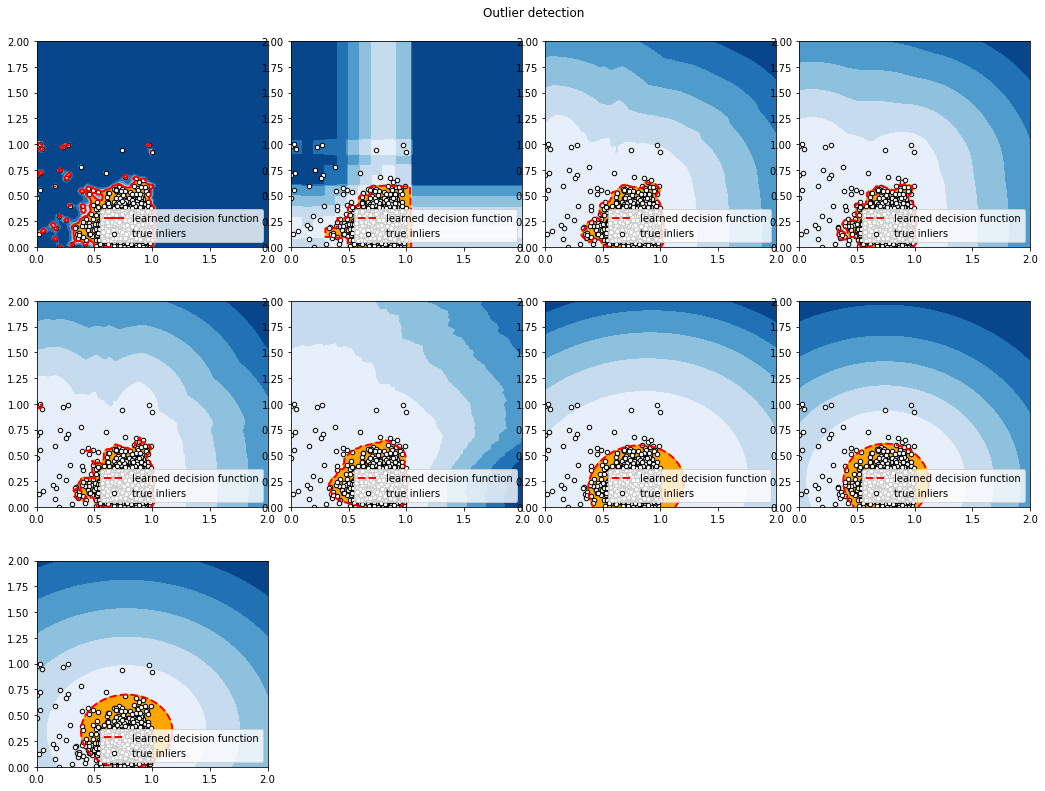

1 fitting Angle-based Outlier Detector (ABOD)
2 fitting Histogram-base Outlier Detection (HBOS)
3 fitting K Nearest Neighbors (KNN)
4 fitting Average KNN
5 fitting Median KNN
6 fitting Local Outlier Factor (LOF)
7 fitting Minimum Covariance Determinant (MCD)
8 fitting One-class SVM (OCSVM)
9 fitting Principal Component Analysis (PCA)


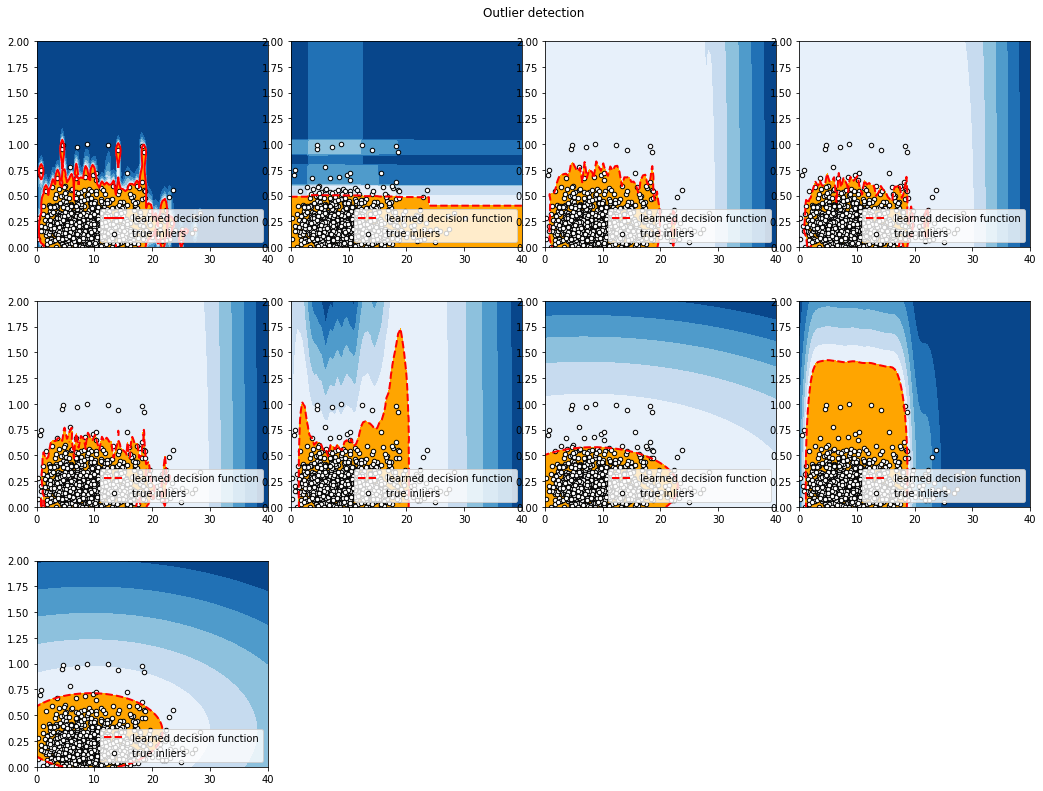

In [58]:

r = train(Y[:,0:2], 0, 40, 0, 2)
for i in range(len(r)):
    if(r[i]>4):
        ans[i] += 1

r = train(Y[:,1:3], 0, 2, 0, 2)
for i in range(len(r)):
    if(r[i]>4):
        ans[i] += 1

r = train(np.concatenate((Y[:,0].reshape(len(Y),1),Y[:,2].reshape(len(Y),1)),axis=1), 0, 40,0, 2)
for i in range(len(r)):
    if(r[i]>4):
        ans[i] += 1

In [59]:
O = []
for i in range(len(Y)):
    if(ans[i]>=2):
        O.append(i)

In [60]:
len(O)

38

In [61]:
outlier_ = []
not_outlier = []
for i in range(len(Y)):
    if i in O:
        outlier_.append(Y[i])
    else:
        not_outlier.append(Y[i])

In [62]:
outlier_ = np.array(outlier_)
not_outlier = np.array(not_outlier)

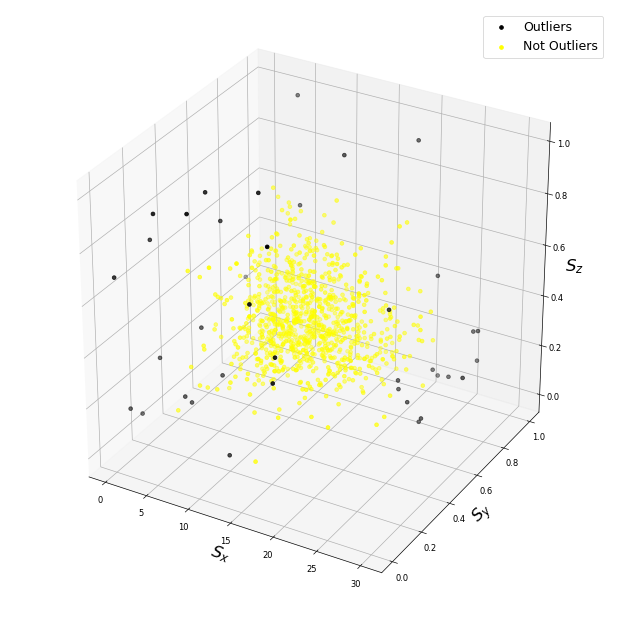

In [63]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(10, 10), dpi= 60, facecolor='w', edgecolor='k')
ax = Axes3D(fig)
ax.set_xlabel('$S_x$', fontsize=20)
ax.set_ylabel('$S_y$', fontsize=20)
ax.zaxis.set_rotate_label(False) 
ax.set_zlabel('$S_z$', fontsize=20, rotation=0)
ax.scatter(outlier_[:, 0], outlier_[:, 1], outlier_[:, 2], color='black', label="Outliers")
ax.scatter(not_outlier[:, 0], not_outlier[:, 1], not_outlier[:, 2], color='yellow', label="Not Outliers")
ax.legend(fontsize=15)
plt.show()

In [64]:
z = data[O,1:5]

In [65]:
z.shape

(38, 4)

In [66]:
final_output = pd.DataFrame(z)
final_output.to_csv('output_150513.csv', index=None)